In [86]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV


e:\python35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
ds = pd.read_csv('../data/ml4/train_data.csv')

In [4]:
ds_test = pd.read_csv('../data/ml4/test_data.csv')

In [5]:
from sklearn import metrics

In [6]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [9]:
ds.shape

(169307, 43)

In [4]:
ds[:10]

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,511,511,255,255,2
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,511,511,255,255,0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,511,511,255,255,0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,511,511,255,255,0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,511,511,255,255,2
5,cxcon_16,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,511,511,255,255,0
6,cxcon_19,0,219,7662,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,3,3,255,255,1
7,cxcon_22,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,511,511,255,255,2
8,cxcon_25,0,0,0,1.0,1.0,0.0,0.0,0.05,0.07,...,0,0,0,0,0,221,11,255,11,0
9,cxcon_28,0,105,0,0.0,0.0,0.0,0.0,1.00,0.00,...,0,0,0,0,0,2,2,255,246,1


In [5]:
ds.apply(lambda x: pd.isnull(x).sum())

connection_id    0
cont_1           0
cont_2           0
cont_3           0
cont_4           0
cont_5           0
cont_6           0
cont_7           0
cont_8           0
cont_9           0
cont_10          0
cont_11          0
cont_12          0
cont_13          0
cont_14          0
cont_15          0
cont_16          0
cont_17          0
cont_18          0
cat_1            0
cat_2            0
cat_3            0
cat_4            0
cat_5            0
cat_6            0
cat_7            0
cat_8            0
cat_9            0
cat_10           0
cat_11           0
cat_12           0
cat_13           0
cat_14           0
cat_15           0
cat_16           0
cat_17           0
cat_18           0
cat_19           0
cat_20           0
cat_21           0
cat_22           0
cat_23           0
target           0
dtype: int64

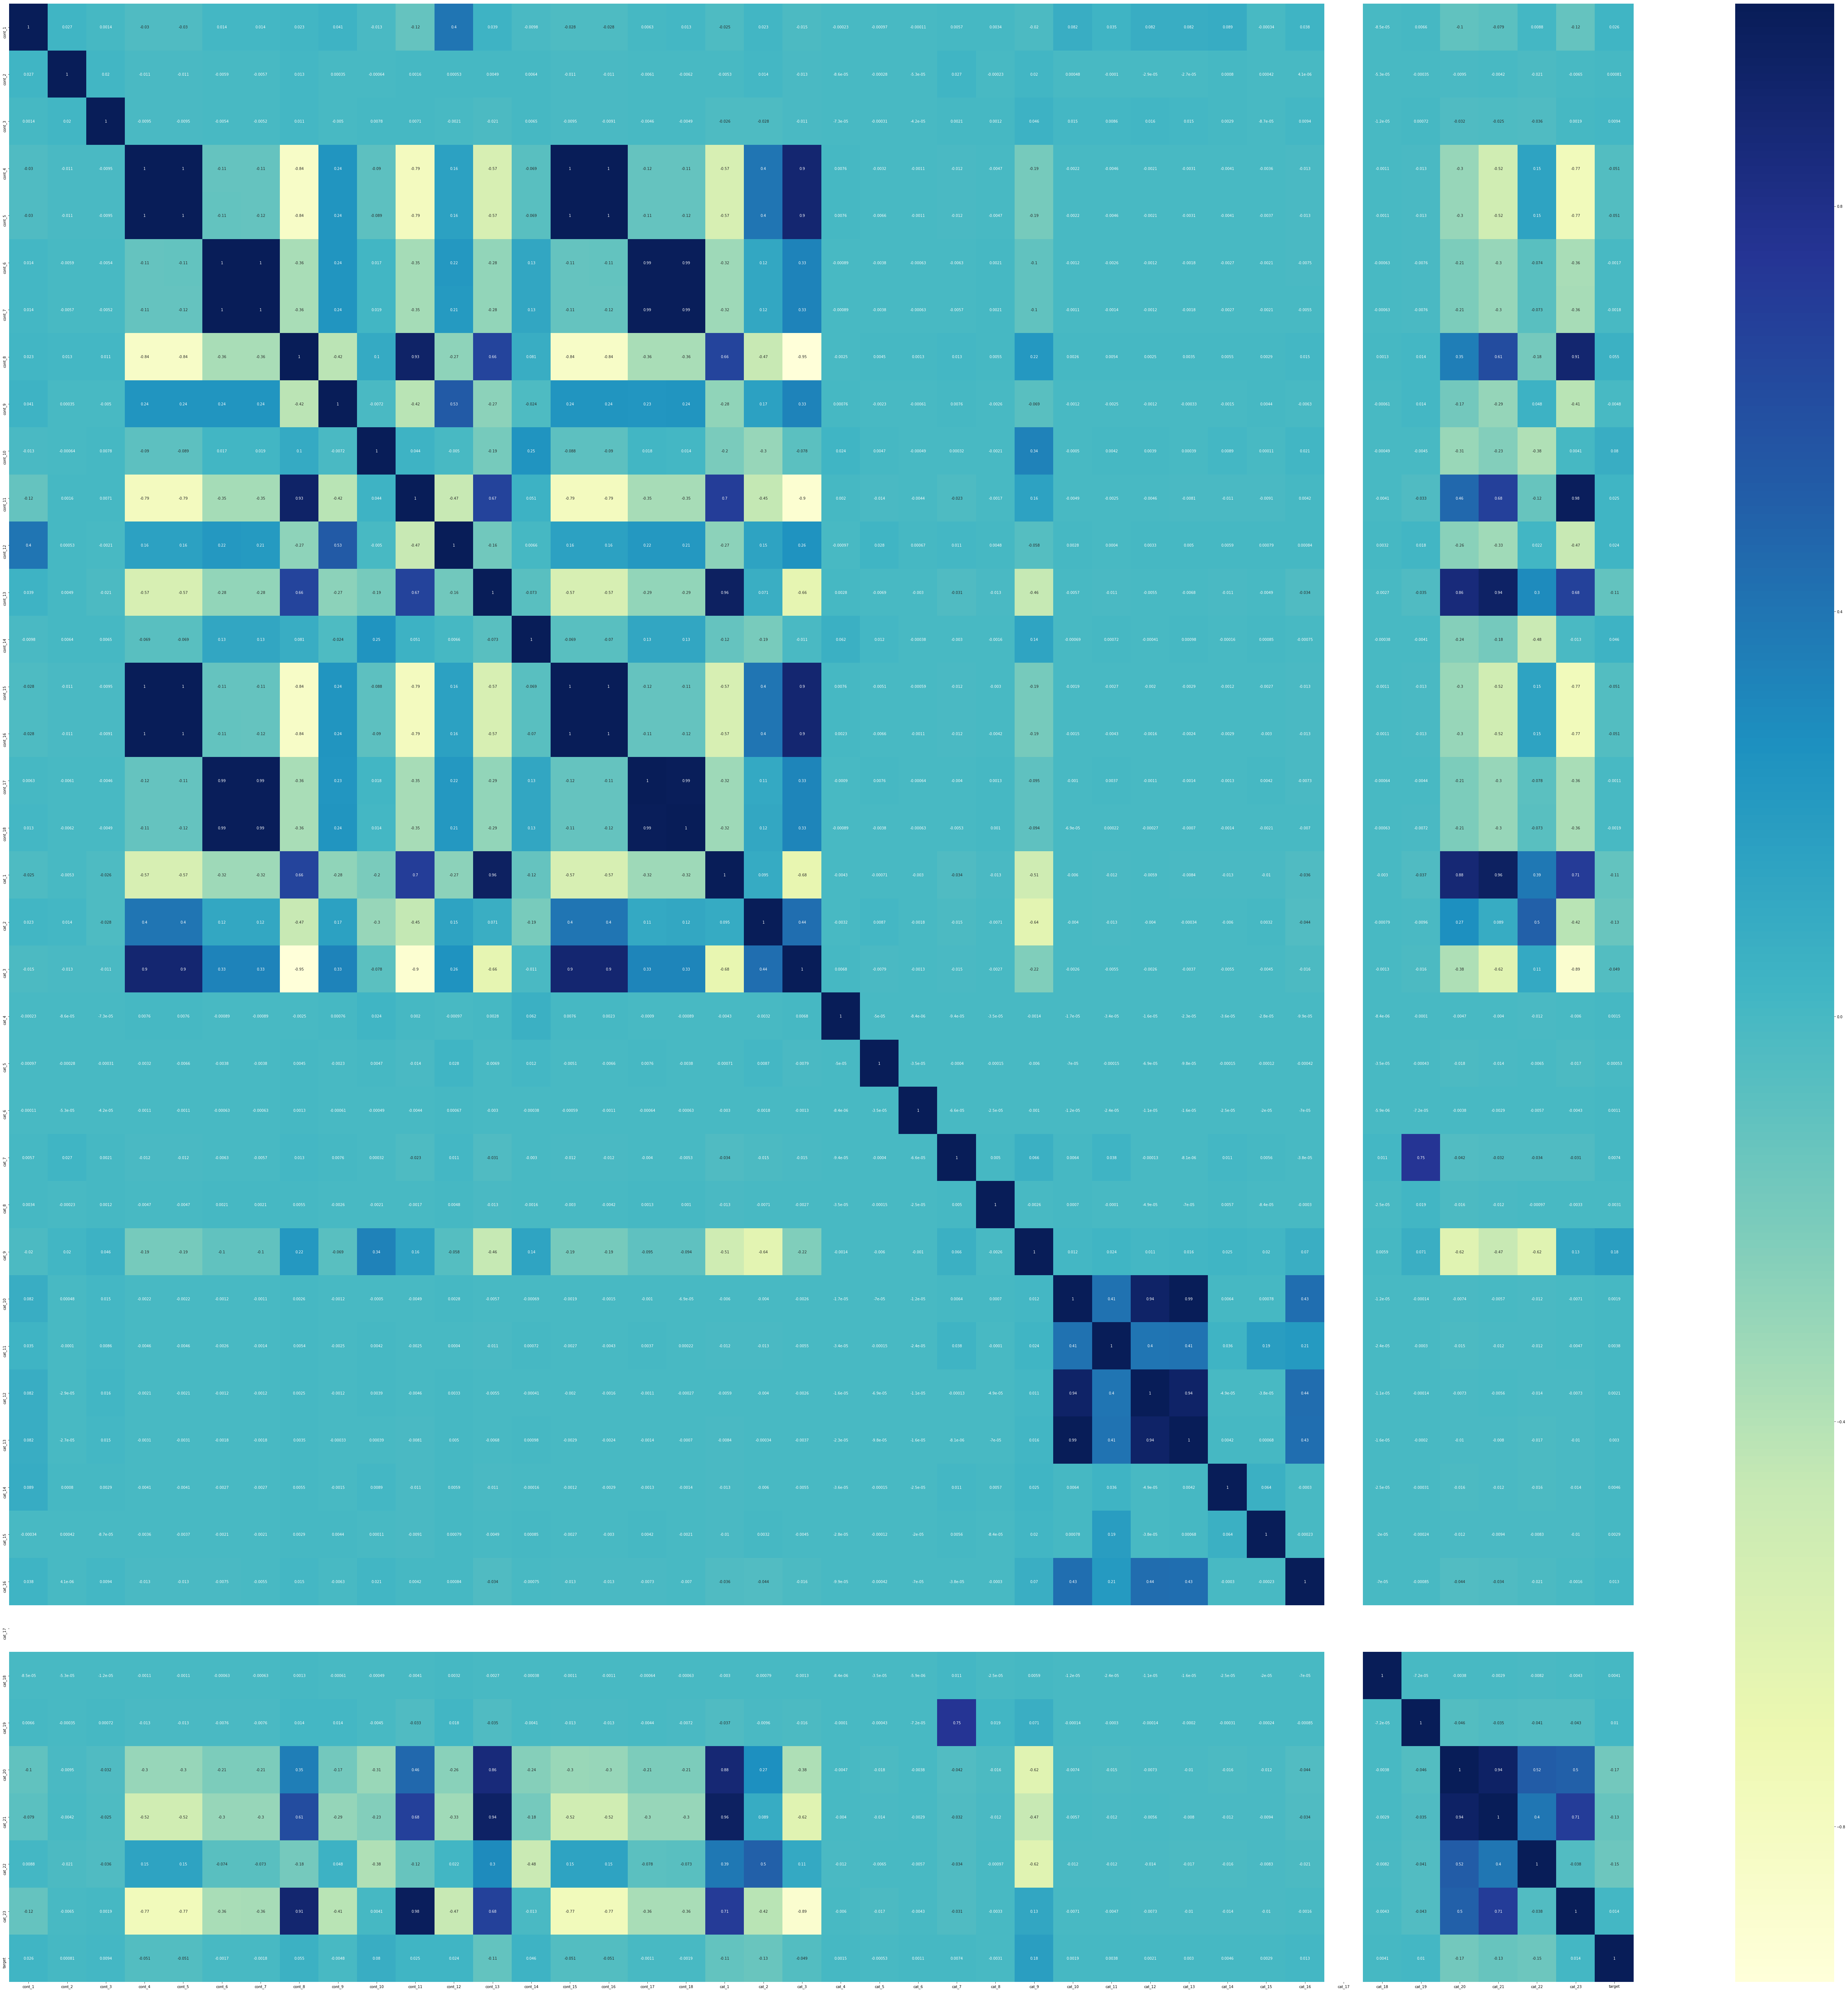

In [11]:
plt.figure(figsize=(100,100))
sns.heatmap(ds.corr(),cmap='YlGnBu', annot=True)
plt.show()

In [6]:
targets = ds['target'].values

In [14]:
targets

array([2, 0, 0, ..., 1, 0, 1], dtype=int64)

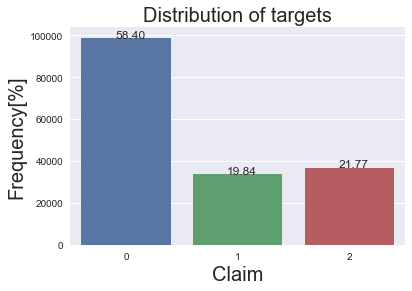

In [26]:
sns.set(style='darkgrid')
ax = sns.countplot(x=targets)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(100*p.get_height()/len(targets)),(p.get_x()+ 0.3, p.get_height()))
    
plt.title('Distribution of targets',fontsize=20)
plt.xlabel('Claim',fontsize=20)
plt.ylabel('Frequency[%]',fontsize=20)
    
plt.show()

In [3]:
ds.columns

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target'],
      dtype='object')

In [6]:
continous_columns = ['connection_id','cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18','target']
continous_dataframe = ds[continous_columns]

In [7]:
continous_dataframe

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,target
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,2
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,2
5,cxcon_16,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0
6,cxcon_19,0,219,7662,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1
7,cxcon_22,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,2
8,cxcon_25,0,0,0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,0.04,0.09,0.00,0.00,1.00,1.00,0.0,0.0,0
9,cxcon_28,0,105,0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.96,0.01,0.01,0.00,0.00,0.00,0.0,0.0,1


In [8]:
categorical_columns = ['connection_id','cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target']
categorical_dataframe = ds[categorical_columns]

In [9]:
categorical_dataframe

,connection_id,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,cxcon_1,3,10,1,0,0,0,0,0,0,...,0,0,0,0,0,511,511,255,255,2
1,cxcon_4,3,10,1,0,0,0,0,0,0,...,0,0,0,0,0,511,511,255,255,0
2,cxcon_7,3,10,1,0,0,0,0,0,0,...,0,0,0,0,0,511,511,255,255,0
3,cxcon_10,3,10,1,0,0,0,0,0,0,...,0,0,0,0,0,511,511,255,255,0
4,cxcon_13,3,10,1,0,0,0,0,0,0,...,0,0,0,0,0,511,511,255,255,2
5,cxcon_16,3,10,1,0,0,0,0,0,0,...,0,0,0,0,0,511,511,255,255,0
6,cxcon_19,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,3,3,255,255,1
7,cxcon_22,3,10,1,0,0,0,0,0,0,...,0,0,0,0,0,511,511,255,255,2
8,cxcon_25,1,13,8,0,0,0,0,0,0,...,0,0,0,0,0,221,11,255,11,0
9,cxcon_28,2,13,1,0,0,0,0,0,0,...,0,0,0,0,0,2,2,255,246,1


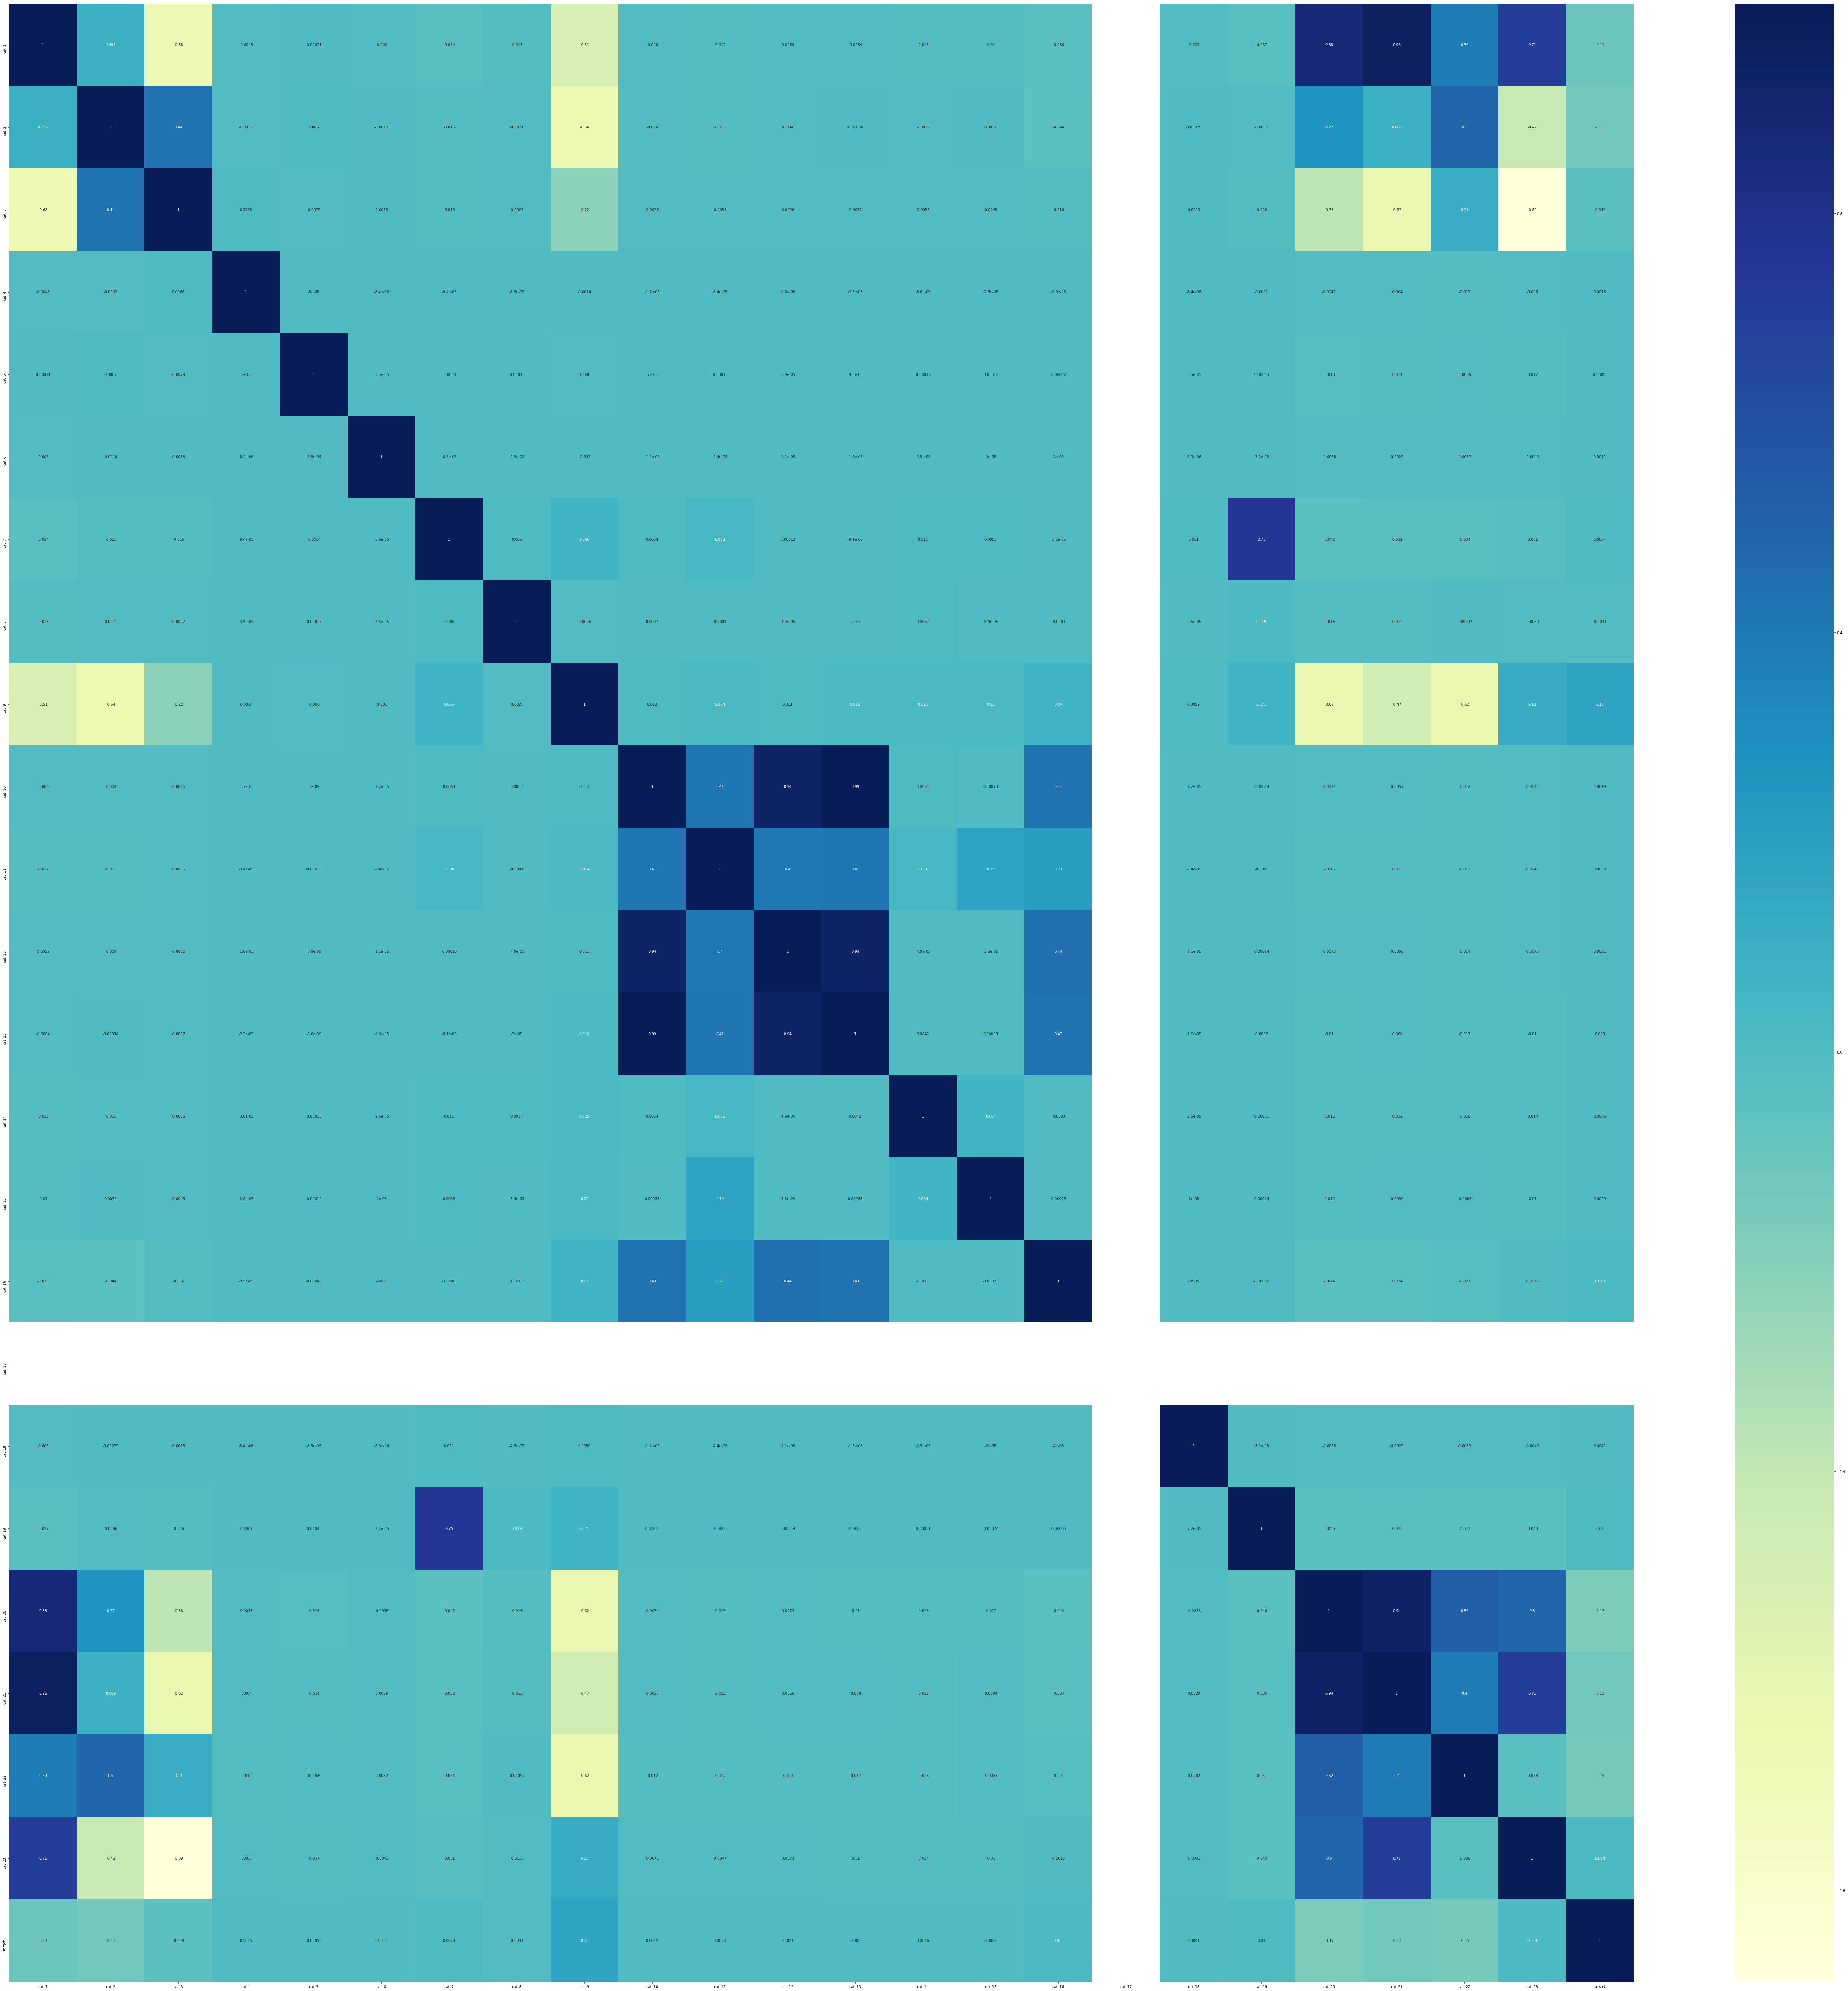

In [17]:
plt.figure(figsize=(100,100))
sns.heatmap(categorical_dataframe.corr(),cmap='YlGnBu',annot=True)
plt.show()

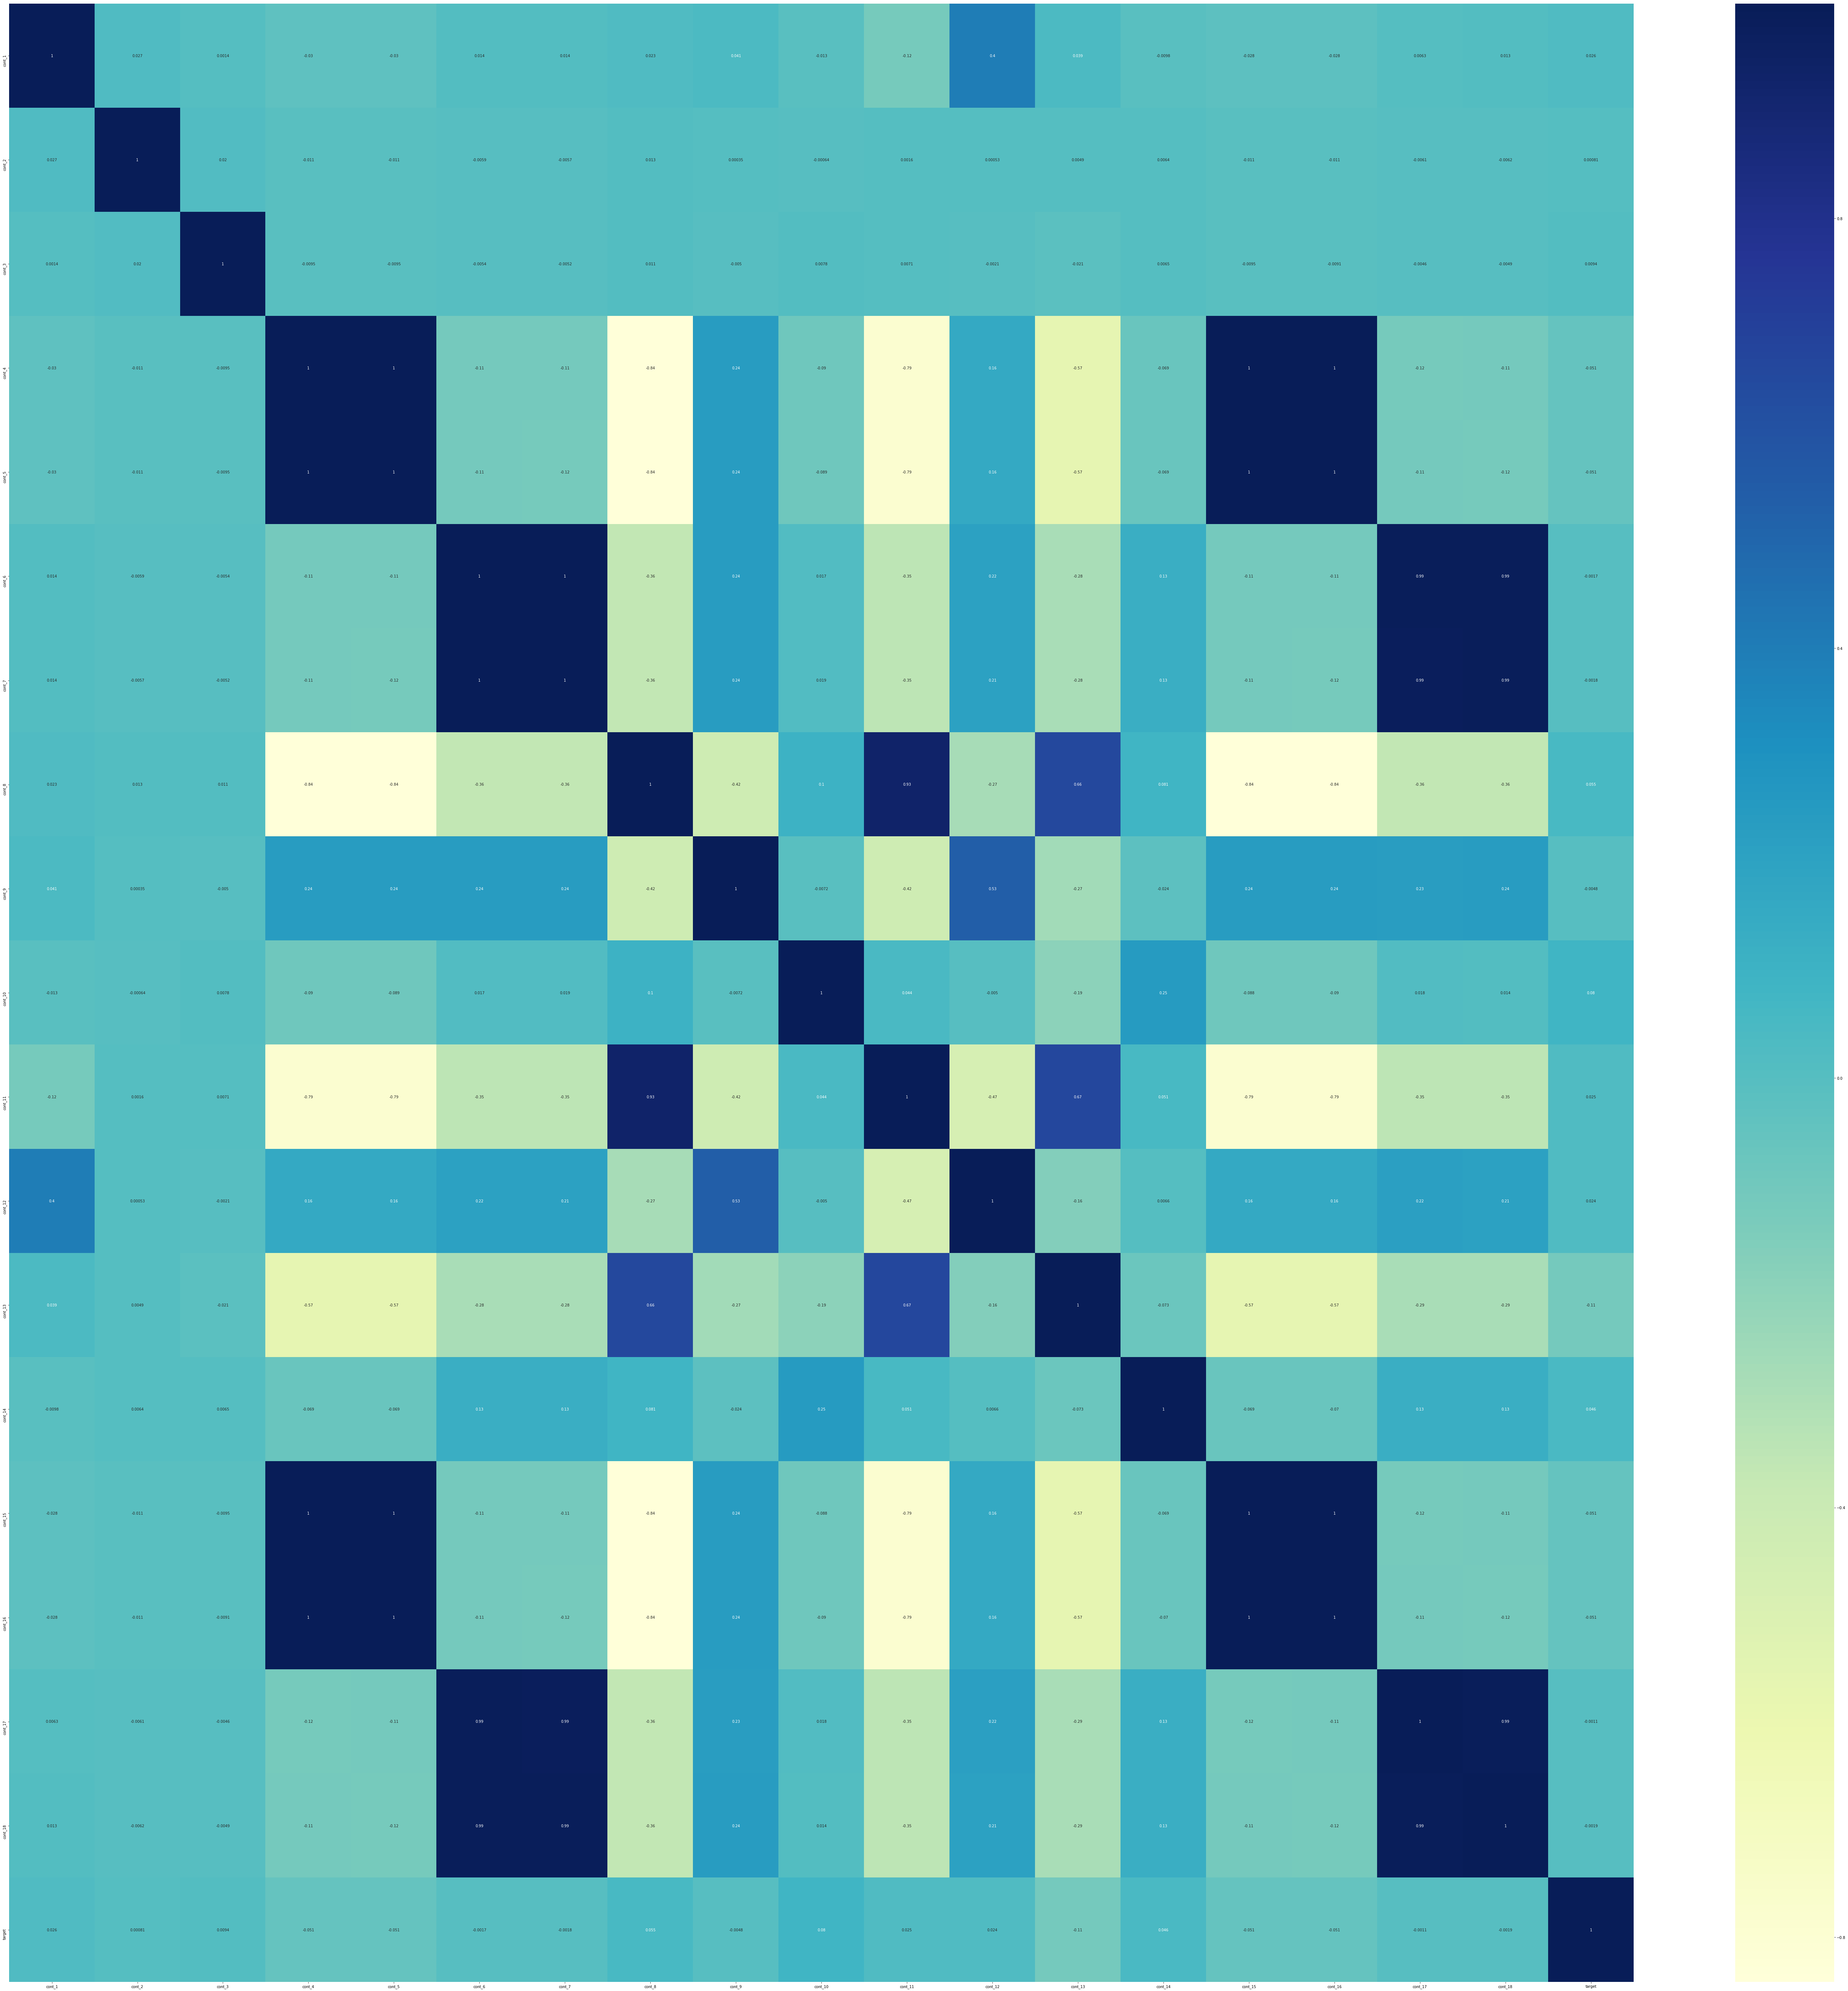

In [18]:
plt.figure(figsize=(100,100))
sns.heatmap(continous_dataframe.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [20]:
ds.apply(lambda x:len(x.value_counts()))

connection_id    169307
cont_1             1076
cont_2             2215
cont_3             6627
cont_4               74
cont_5               48
cont_6               77
cont_7               51
cont_8               90
cont_9               70
cont_10              64
cont_11             101
cont_12             101
cont_13             101
cont_14              57
cont_15              92
cont_16              70
cont_17             101
cont_18              99
cat_1                 3
cat_2                64
cat_3                11
cat_4                 2
cat_5                 3
cat_6                 2
cat_7                18
cat_8                 2
cat_9                 2
cat_10               11
cat_11                2
cat_12                3
cat_13               10
cat_14               10
cat_15                3
cat_16                6
cat_17                1
cat_18                2
cat_19                2
cat_20              439
cat_21              393
cat_22              256
cat_23          

In [7]:
predictors = [x for x in ds.columns if x not in ['connection_id','target']]
preds = []

In [11]:
predictors

['cont_1',
 'cont_2',
 'cont_3',
 'cont_4',
 'cont_5',
 'cont_6',
 'cont_7',
 'cont_8',
 'cont_9',
 'cont_10',
 'cont_11',
 'cont_12',
 'cont_13',
 'cont_14',
 'cont_15',
 'cont_16',
 'cont_17',
 'cont_18',
 'cat_1',
 'cat_2',
 'cat_3',
 'cat_4',
 'cat_5',
 'cat_6',
 'cat_7',
 'cat_8',
 'cat_9',
 'cat_10',
 'cat_11',
 'cat_12',
 'cat_13',
 'cat_14',
 'cat_15',
 'cat_16',
 'cat_17',
 'cat_18',
 'cat_19',
 'cat_20',
 'cat_21',
 'cat_22',
 'cat_23']

In [29]:
def modelfitxg(alg,dtrain,predictors,preds,useTrainCV=True,cv_folds=5,early_stopping_rounds=50):
    
    if useTrainCV:
        
        xgb_params = alg.get_xgb_params()
        xgb_params['num_class'] = 3
        print(xgb_params)
        xgtrain = xgb.DMatrix(dtrain[predictors].values,label=dtrain['target'].values)
        print('prepared Dmatrix')
        cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round = alg.get_params()['n_estimators'],
                         nfold=cv_folds,early_stopping_rounds=early_stopping_rounds)
#         alg.set_params(n_estimators=cvresult.shape[0])
        
    # fit the algorithm
        print(cvresult)
    
    print('Fitting Model')
    alg.fit(dtrain[predictors],dtrain['target'],eval_metric='auc')
    print('Model Fitted')
    preds = alg.predict(ds_test[predictors])
    #predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    print ("Accuracy: %.4f"%metrics.accuracy_score(dtrain['target'].values,dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[''], dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar',title='Feature Importance')
    plt.ylabel('Feature Importance Score')

In [24]:
def modelfit(alg,dtrain,predictors,preds,performCV=True,printFeatureImportance=True,cv_folds=5):
    
    xgbtrain = xgb.DMatrix(data=dtrain[predictors],label=dtrain['target'].values)
    xgb_params = alg.get_xgb_params()
    xgb_params['num_class'] = 3
    xgbtest = xgb.DMatrix(data=ds_test[predictors])
    clf1 = xgb.train(xgb_params,xgbtrain)
    print('Model fitted')
    preds = clf1.predict(xgbtest)
#     dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#     perform cross-validation
    
    if performCV:
        print('performing cross validation')
        cvresult = xgb.cv(xgb_params, xgbtrain, num_boost_round = 500,
                         nfold=cv_folds,early_stopping_rounds=40)
    #print model report
        print(cvresult)
    print('\n Model Report')
#     print ("Accuracy: %.4f"%metrics.accuracy_score(dtrain['target'].values,dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['target'], dtrain_predprob))
    
#     if performCV:
#         print("CV Score: Mean- %.7g | Std- %.7g | Min- %.7g | Max - %.7g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
        
    if printFeatureImportance:
        feat_imp = pd.Series(xgb.Booster().get_fscore()).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importance')
        plt.show()
        
                                                    

In [5]:
ds['target'].values

array([2, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:

xgb1 = XGBClassifier(learning_rate=0.1,
                     n_estimators=500,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='multi:softmax',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)



In [30]:
preds = []
modelfitxg(xgb1,ds,predictors,preds)

{'scale_pos_weight': 1, 'objective': 'multi:softmax', 'colsample_bytree': 0.8, 'missing': None, 'reg_lambda': 1, 'seed': 27, 'base_score': 0.5, 'num_class': 3, 'min_child_weight': 1, 'subsample': 0.8, 'max_depth': 5, 'silent': 1, 'max_delta_step': 0, 'nthread': 4, 'n_estimators': 500, 'reg_alpha': 0, 'learning_rate': 0.1, 'colsample_bylevel': 1, 'gamma': 0}
prepared Dmatrix
     test-merror-mean  test-merror-std  train-merror-mean  train-merror-std
0            0.222019         0.000919           0.221811          0.000196
1            0.222061         0.000996           0.221906          0.000385
2            0.222031         0.000949           0.221913          0.000243
3            0.221913         0.000903           0.221805          0.000354
4            0.221860         0.000928           0.221700          0.000268
5            0.221848         0.000955           0.221721          0.000270
6            0.221925         0.000926           0.221743          0.000321
7            0.

In [32]:
feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)

In [33]:
feat_imp

cat_20     5453
cat_23     3361
cat_21     2758
cat_2      2498
cont_12    2179
cont_11    1986
cont_8     1898
cont_2     1769
cont_3     1561
cont_9     1413
cont_13    1104
cat_22     1023
cont_17     996
cont_1      817
cont_14     533
cont_15     497
cont_4      454
cont_6      401
cat_3       297
cat_7       239
cont_16     211
cont_10     204
cont_18     200
cat_1       200
cat_9       143
cont_7      123
cont_5       99
cat_5        73
cat_10       51
cat_8        28
cat_19       26
cat_11       14
cat_14       11
cat_16        3
cat_13        2
dtype: int64

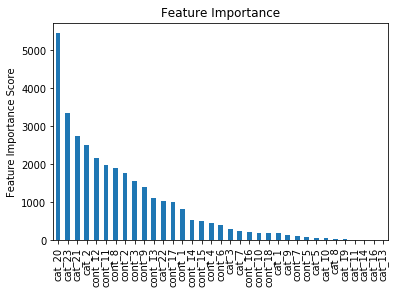

In [34]:
feat_imp.plot(kind='bar',title='Feature Importance')
plt.show()

In [7]:
target = ds['target']
X_train, X_valid, y_train, y_valid = train_test_split(ds, ds['target'], train_size = 0.7, stratify = target, random_state = 2017)

In [59]:
type(test_connections[1])

str

In [35]:
preds

[]

In [17]:
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = metrics.accuracy_score(label, pred)
    return 'maccuracy', acc

In [23]:
xgb_params = xgb1.get_xgb_params()
xgb_params['num_class'] = 3

In [22]:
dtrain = xgb.DMatrix(data=X_train[predictors], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[predictors], label=y_valid)
dtest = xgb.DMatrix(data=ds_test[predictors])

In [25]:
clf1 = xgb.train(xgb_params, dtrain, 1000, watchlist, maximize=True, verbose_eval=20, early_stopping_rounds=40, feval=multAcc)

[0]	train-maccuracy:0.777672	eval-maccuracy:0.777351
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 40 rounds.
[20]	train-maccuracy:0.780288	eval-maccuracy:0.780501
[40]	train-maccuracy:0.780946	eval-maccuracy:0.780934
[60]	train-maccuracy:0.781292	eval-maccuracy:0.780974
[80]	train-maccuracy:0.781503	eval-maccuracy:0.780993
[100]	train-maccuracy:0.781671	eval-maccuracy:0.780993
Stopping. Best iteration:
[69]	train-maccuracy:0.781401	eval-maccuracy:0.781033



In [88]:
param_1 = {'n_estimators':[300,400,500,600,700]}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=500,
                                                max_depth=5,
                                                min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='multi:softmax',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                                                param_grid = param_1,
                                                scoring = 'accuracy',
                                                iid=False,n_jobs=4,cv=5)

In [ ]:
gsearch1.fit(ds[predictors],ds['target'])

In [41]:
test_targets = xgb1.predict(ds_test[predictors])

In [63]:
test_targets = test_targets.astype(int)

In [64]:
type(test_targets[0])

numpy.int32

In [85]:
for i in range(len(test_targets)):
    if test_targets[i] == 2:
        print(i)

942
1731
2122
2127
2708
3337
3423
3882
4331
4630
5493
6395
7469
10034
10426
10757
11016
11228
11809
12262
12941
13688
14029
14080
14958
16441
17382
17686
17936
18195
18285
18469
19007
19336
19784
20086
20669
21191
22371
22407
22657
23369
23540
24492
24748
25358
25541
25677
25829
26500
26999
27478
28087
28623
30408
30716
31793
32262
34041
35323
35778
35872
36142
36233
36571
37045
37537
37602
37711
38306
38413
38570
39295
39308
39865
40843
41545
42487
43069
43842
43849
45961
46397
46668
48225
48238
48314
49167
49817
50454
50728
50823
52070
52101
52186
52415
53235
54417
54806
55705
55864
56609
56921
58170
58357
58642
58654
58692
59544
59818
60556
60610
61266
61459
61465
61853
61906
62618
62778
63058
64444
64486
64819
64820
64840
65324
65551
66071
67218
67245
67473
67630
69167
69409
69852
70203
70639
71903
72515
72520
72729
72829
72878
72918
73273
74113
74901
74963
75454
75872
76808
77177
77230
77615
78287
78349
78567
79574
79618
80067
80201
80591
80781
80815
80870
81340
81725
82371
83301


In [45]:
test_connections = ds_test['connection_id']

In [65]:
len(test_connections)

91166

In [50]:
ds_test.shape

(91166, 42)

In [81]:
output = []
for i in range(len(test_connections)):
    output.append((test_connections[i],test_targets[i]))

In [82]:
output

[('cxcon_2', 1),
 ('cxcon_5', 0),
 ('cxcon_8', 0),
 ('cxcon_11', 0),
 ('cxcon_14', 0),
 ('cxcon_17', 0),
 ('cxcon_20', 0),
 ('cxcon_23', 1),
 ('cxcon_26', 0),
 ('cxcon_29', 0),
 ('cxcon_32', 0),
 ('cxcon_35', 1),
 ('cxcon_38', 0),
 ('cxcon_41', 0),
 ('cxcon_44', 1),
 ('cxcon_47', 0),
 ('cxcon_50', 0),
 ('cxcon_53', 0),
 ('cxcon_56', 0),
 ('cxcon_59', 1),
 ('cxcon_62', 0),
 ('cxcon_65', 0),
 ('cxcon_68', 0),
 ('cxcon_71', 0),
 ('cxcon_74', 1),
 ('cxcon_77', 0),
 ('cxcon_80', 0),
 ('cxcon_83', 0),
 ('cxcon_86', 0),
 ('cxcon_89', 1),
 ('cxcon_92', 1),
 ('cxcon_95', 0),
 ('cxcon_98', 1),
 ('cxcon_101', 1),
 ('cxcon_104', 0),
 ('cxcon_107', 0),
 ('cxcon_110', 0),
 ('cxcon_113', 0),
 ('cxcon_116', 0),
 ('cxcon_119', 0),
 ('cxcon_122', 0),
 ('cxcon_125', 0),
 ('cxcon_128', 0),
 ('cxcon_131', 0),
 ('cxcon_134', 0),
 ('cxcon_137', 0),
 ('cxcon_140', 0),
 ('cxcon_143', 1),
 ('cxcon_146', 0),
 ('cxcon_149', 0),
 ('cxcon_152', 0),
 ('cxcon_155', 0),
 ('cxcon_158', 0),
 ('cxcon_161', 0),
 ('cxcon_1

In [67]:
output = np.asarray(output)
output.shape

(91166, 2)

In [80]:
(output[10,1])

'0'

In [84]:
np.savetxt('./ml4output.csv',output,fmt='%s,%s',delimiter=',',header='connection_id,target')